In [1]:
library(devtools)
install_github("mxcai/VCM")


Loading required package: usethis




-- R CMD build -----------------------------------------------------------------
* checking for file '/private/var/folders/lg/fh1btryj4_36gn7kys4s793w0000gn/T/RtmpnBlPWZ/remotes56c95b20a775/mxcai-VCM-c52e20a/DESCRIPTION' ... OK
* preparing 'VCM':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'VCM_0.1.0.tar.gz'



In [4]:
library(glmnet)
library(VCM)
library(ggplot2)
library(RhpcBLASctl)
blas_set_num_threads(30)


In [10]:
data <- read.table("./data/XYZ_MoM.txt", header = TRUE)
y <- data[, 1]
Z <- data[, 2:31]
X <- data[, 32:ncol(data)]
n <- nrow(data)
p <- ncol(X)


In [11]:
# convert to matrix
y <- as.matrix(y)
Z <- as.matrix(Z)
X <- as.matrix(X)


In [13]:
# fit model
fit_lmm <- linRegPXEM(X, y, Z)
# list(beta0=beta0,sb2=sb2,se2=se2,mu=mu,gamma=gamma,iter=iter,covSig=covSig,lb=lb)


2 -th iteration, lower bound =  -1358.18  ,diff= Inf ,sb2= 0.4549588 ,se2= 0.4549588 
3 -th iteration, lower bound =  -1357.506  ,diff= 0.6745117 ,sb2= 0.4426135 ,se2= 0.4572527 
4 -th iteration, lower bound =  -1357.292  ,diff= 0.213629 ,sb2= 0.4356707 ,se2= 0.4615513 
5 -th iteration, lower bound =  -1357.186  ,diff= 0.1067042 ,sb2= 0.4302447 ,se2= 0.4661681 
6 -th iteration, lower bound =  -1357.107  ,diff= 0.07901278 ,sb2= 0.4252888 ,se2= 0.4707214 
7 -th iteration, lower bound =  -1357.037  ,diff= 0.06976312 ,sb2= 0.4205299 ,se2= 0.4751518 
8 -th iteration, lower bound =  -1356.972  ,diff= 0.06490895 ,sb2= 0.4158995 ,se2= 0.4794643 
9 -th iteration, lower bound =  -1356.911  ,diff= 0.06118605 ,sb2= 0.4113807 ,se2= 0.48367 
10 -th iteration, lower bound =  -1356.853  ,diff= 0.0578331 ,sb2= 0.40697 ,se2= 0.4877759 
11 -th iteration, lower bound =  -1356.798  ,diff= 0.05466891 ,sb2= 0.4026663 ,se2= 0.4917856 
12 -th iteration, lower bound =  -1356.747  ,diff= 0.05164798 ,sb2= 0.39846

beta0: -0.07462987 -0.001670342 -0.009522171 0.01006861 0.001056821 -0.006359381 -0.03091685 -0.03172631 0.006594002 -0.05042546 -0.06559637 -0.02099043 -0.02400084 -0.04580099 -0.02101087 -0.006245873 0.04358112 0.009545916 0.007941465 -0.03418103 -0.009703243 -0.001060279 -0.03770879 -0.006425725 0.009936954 0.006980076 0.01420178 0.01474234 -0.004927001 -0.009368185 0.04430783 
var_e: 0.6165358 
var_b: 0.2719648 
mu: -0.07895333 0.08229197 0.06085047 0.04861649 0.1635735 -0.1952245 -0.03930278 -0.003093442 0.2313715 -0.2104344 -0.09830766 0.0357529 -0.1643324 -0.1566956 0.01972922 0.00624268 -0.01516924 -0.236357 -0.02383768 0.0973831 -0.02404932 0.04498245 -0.07976832 0.03978275 0.1262275 4.548778e-05 0.06488272 0.008812538 0.1472277 0.08948221 0.06775483 -0.01356808 -0.1030025 -0.1742093 0.03321814 -0.170422 -0.2526913 -0.1151985 -0.02220364 -0.1644675 -0.09418233 -0.01074211 -0.2287156 0.1015314 0.05397335 -0.1156122 0.2400075 -0.1251859 -0.1374062 0.121977 -0.08434236 -0.1650483

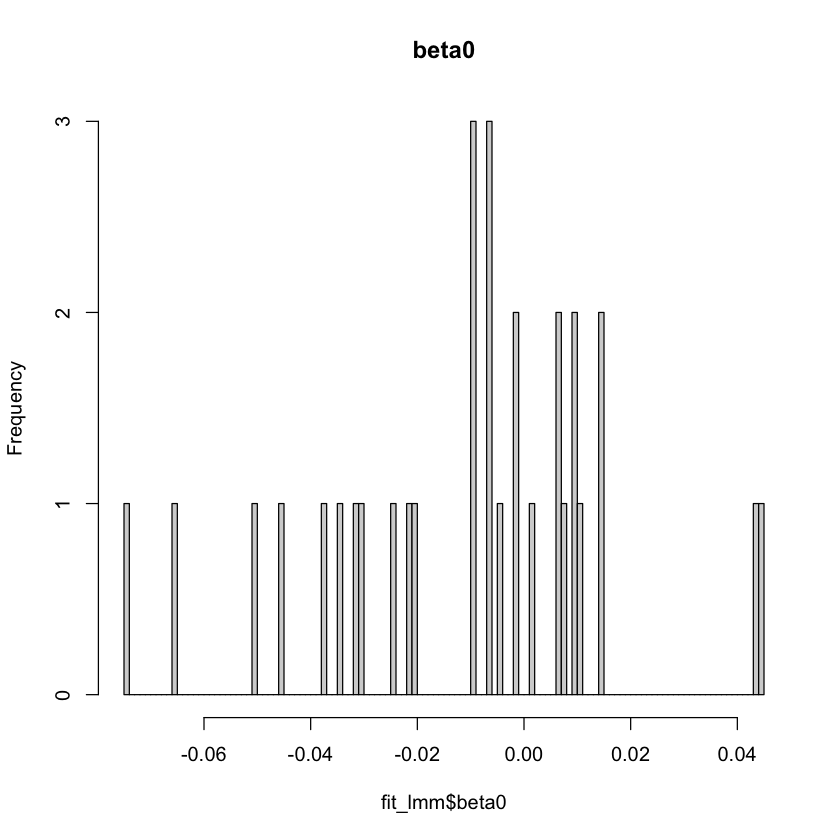

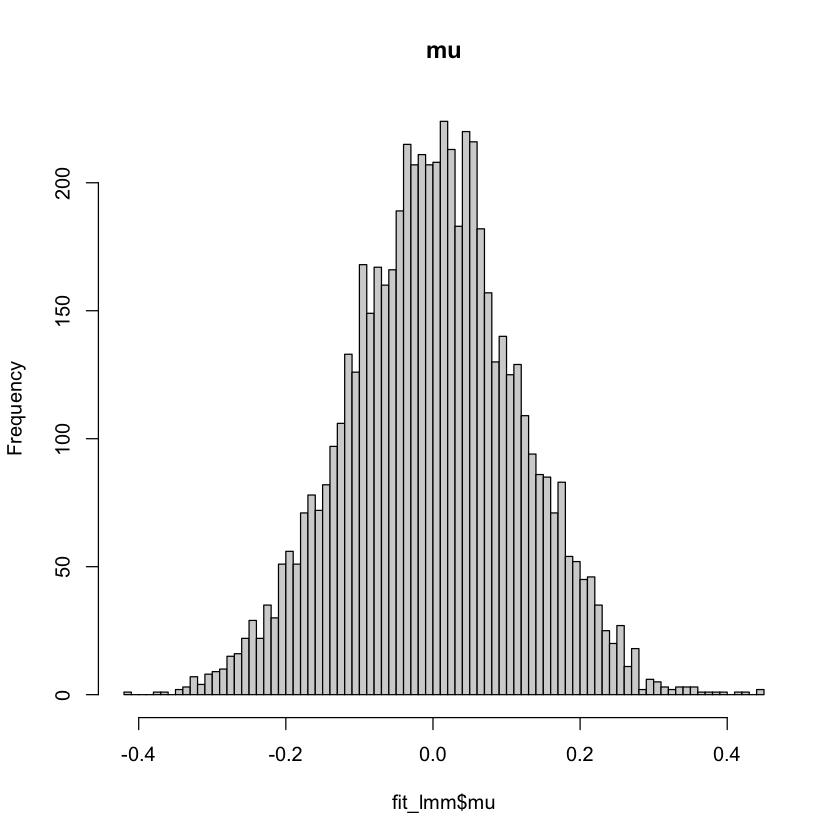

In [15]:
cat("beta0:", fit_lmm$beta0, "\n")
cat("var_e:", fit_lmm$se2, "\n")
cat("var_b:", fit_lmm$sb2, "\n")
cat("mu:", fit_lmm$mu, "\n")
# plot hist
hist(fit_lmm$beta0, breaks = 100, main = "beta0")
hist(fit_lmm$mu, breaks = 100, main = "mu")
